In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [4]:
colNames = ['class', 
'cap-shape',
'cap-surface',
'cap-color',
'bruises?',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat']

featuresNames = ['cap-shape',
'cap-surface',
'cap-color',
'bruises?',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat']

In [5]:
data_src = pd.read_csv('../datasets/Mushrooms/agaricus-lepiota.data',header=None, names=colNames)

## 0. Basic cleaning

In [6]:
data = pd.get_dummies(data_src.dropna(), columns=featuresNames)

In [7]:
X = data.drop(axis=1, columns=['class'])
Y = pd.DataFrame(np.where(data.dropna()['class'] == 'e', 1, 0))

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 1. Decision tree

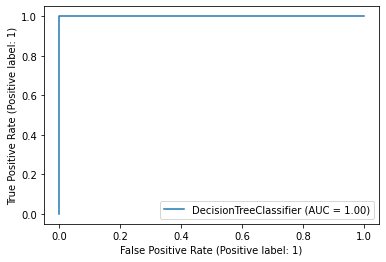

In [9]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
plot_roc_curve(dt, X_test, Y_test)

## 2. SVM Linéaire

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


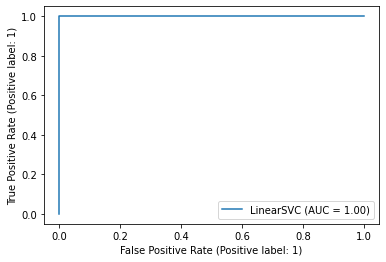

In [10]:
svmLinear = svm.LinearSVC()
svmLinear.fit(X_train, Y_train)
plot_roc_curve(svmLinear, X_test, Y_test)

## 3. SVM avec d'autres Kernel

### RBF

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


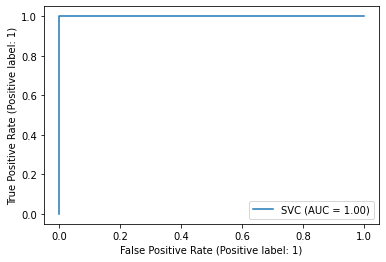

In [11]:
svmRBF = svm.SVC(kernel='rbf')
svmRBF.fit(X_train, Y_train)
plot_roc_curve(svmRBF, X_test, Y_test)

### Polynomial

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


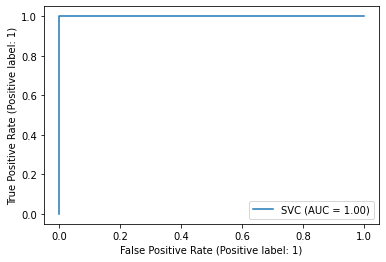

In [12]:
svmPoly = svm.SVC(kernel='poly')
svmPoly.fit(X_train, Y_train)
plot_roc_curve(svmPoly, X_test, Y_test)

## 4. Neural Network

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


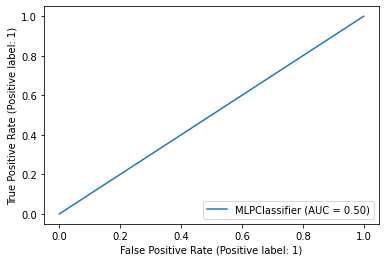

In [13]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)

/home/rbury/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


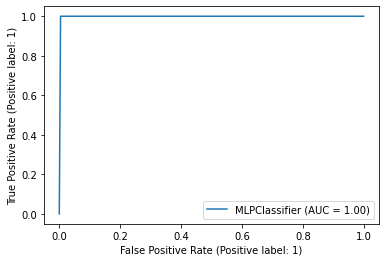

In [14]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)